In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Brownian Motion

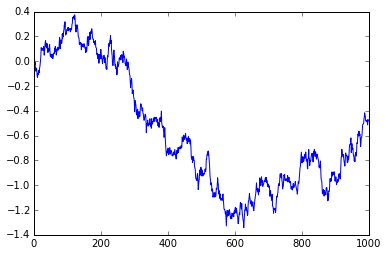

In [2]:
T = 1.0
N = 1000
dt = T/N
dW = zeros(N)
W = zeros(N)

dW = sqrt(dt) * random.normal(size=N)
W = dW.cumsum()
plot(W)

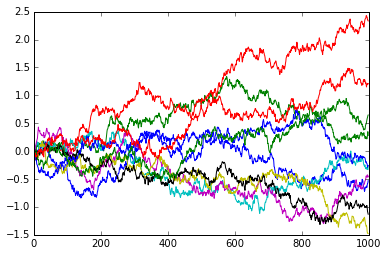

In [3]:
T = 1.0
N = 1000
M = 10
dt = T/N
dW = zeros((N, M))
W = zeros((N, M))

random.seed(100)

for i in range(M):
    dW = sqrt(dt) * random.normal(size=N)
    W[:,i] = dW.cumsum()
    plot(W[:,i])

# Function of W(t)

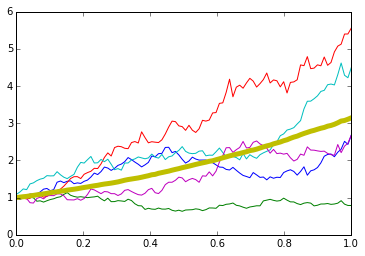

In [4]:
T = 1.0
N = 100
M = 500
dt = T/N
dW = zeros((N, M))
W = zeros((N, M))

t = linspace(0,T,N)
U = W.copy()
for i in range(M):
    dW = sqrt(dt) * random.normal(size=N)
    W[:,i] = dW.cumsum()
    U[:,i] = exp(t + 0.5 * W[:,i])

for i in random.choice(arange(M),size=5):
    plot(t, U[:,i])
plot(t, U.mean(axis=1), lw=5)

0.0969578450577


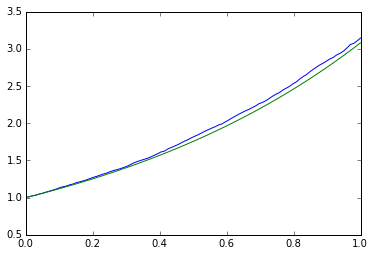

In [5]:
plot(t, U.mean(axis=1))
plot(t, exp(9.0/8.0 * t))
print norm((U.mean(axis=1)- exp(9.0/8.0 * t)),ord=inf)

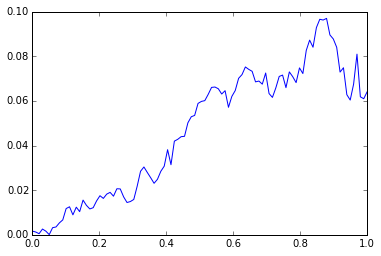

In [6]:
plot(t, abs(U.mean(axis=1) - exp(9.0/8.0 * t)))

## Ito and Stratonovich Integrals

In [7]:
T = 1.0
N = 1000
dt = T/N
dW = zeros(N)
W = zeros(N)

dW = sqrt(dt) * random.normal(size=N)
W = dW.cumsum()
W = insert(W,0,0)

ito = sum(W[0:-1] * dW)

strat = sum((0.5 * (W[0:-1] + W[1:]) + 0.5 * sqrt(dt) * random.normal(size=N)) * dW)

itoerr = abs(ito - 0.5*(W[-1]**2-T))
straterr = abs(strat - 0.5 * W[-1]**2)

print "Ito:", ito
print "Strat:", strat
print "Error of Ito:",itoerr
print "Error of Strat:", straterr

Ito: 0.284702555399
Strat: 0.79074137579
Error of Ito: 0.00318051864766
Error of Strat: 0.00921933903828


## Euler Maruyama para la Ec. Black-Scholes.

Error at endpoint:  0.0321733814685


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


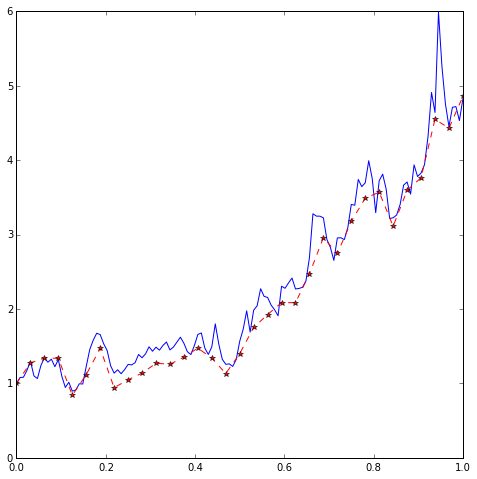

In [8]:
gamma=2
mu=1
Xzero=1

T=1
N=2**7
dt = float(T)/N
t = linspace(0,T,N+1)

dW = sqrt(dt) * random.randn(1,N)
W = cumsum(dW)

Xtrue = Xzero * exp((gamma-0.5*mu**2)*t[1:] + mu* W)
Xtrue = insert(Xtrue,0,Xzero)

figure(figsize=(8,8))
plot(t,Xtrue)

R=4
Dt = R*dt
L = float(N)/R
Xem = zeros(L+1) # Euler Maruyama Solution 
Xem[0] = Xzero

for j in range(1,int(L)+1):
    Winc = sum(dW[0][range(R*(j-1), R*j)]) # subsample
    Xem[j] = Xem[j-1] + Dt * gamma * Xem[j-1] + mu * Xem[j-1] * Winc

emerr=np.abs(Xem[-1]-Xtrue[-1])
print "Error at endpoint: ", emerr

plot(np.linspace(0,T,L+1),Xem,'r--*')